In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from helperfun import plot_decision_boundary

2024-06-29 08:04:43.200552: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-29 08:04:43.200869: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-29 08:04:43.204395: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-29 08:04:43.241465: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-29 08:04:43.829557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

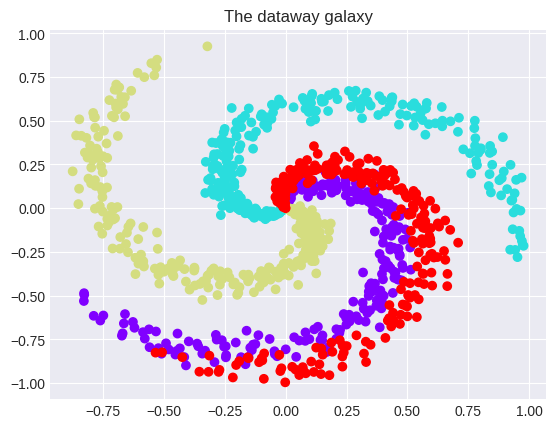

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def generate_spiral(num_points, num_classes, noise=0.2):
    X, y = [], []
    for class_number in range(num_classes):
        r = np.linspace(0.0, 1, num_points)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, num_points) + np.random.randn(num_points) * noise
        x1, x2 = r * np.sin(t), r * np.cos(t)
        X.append(np.c_[x1, x2])
        y.append(np.full(num_points, class_number))
    X, y = np.concatenate(X), np.concatenate(y)
    return X, y

X, y = generate_spiral(
    num_points=250, 
    num_classes=4,
    noise=0.2
)

plt.style.use("seaborn-v0_8-darkgrid")
plt.title("The dataway galaxy")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=64)

y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [3]:
spirals_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softplus),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.sigmoid)
])

spirals_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history = spirals_model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step


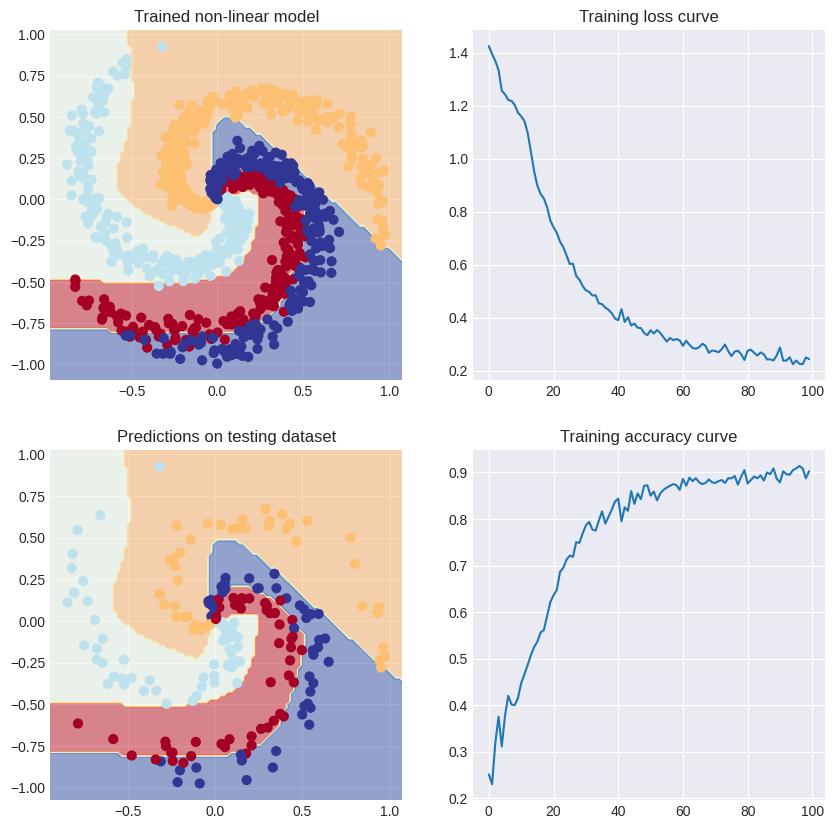

In [4]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Trained non-linear model")
plot_decision_boundary(spirals_model, X, y, alpha=0.5)

plt.subplot(2, 2, 2)
plt.title("Training loss curve")
plt.plot(history.history["loss"])

plt.subplot(2, 2, 3)
plt.title("Predictions on testing dataset")
plot_decision_boundary(spirals_model, X_test, tf.argmax(y_test, 1), alpha=0.5)

plt.subplot(2, 2, 4)
plt.title("Training accuracy curve")
plt.plot(history.history["accuracy"])